# Config

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install -U pip setuptools wheel
!pip install -U 'spacy[cuda12x]'
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

  

In [3]:
!pip install tqdm

In [4]:
!pip install beautifulsoup4

In [5]:
import pandas as pd
import numpy as np
import spacy
from spacy.matcher import Matcher
import matplotlib.pyplot as plt
import seaborn
from tqdm._tqdm_notebook import tqdm_notebook
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics

seaborn.set_style('darkgrid')

tqdm_notebook.pandas()
np.random.seed(101)

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_trf")

/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''
/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:447: UserWarning: 
--------------------------------------------

# EDA antes do pré processamento


In [6]:
df = pd.read_csv("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/IMDB Dataset.csv")

Para fins de praticidade mostra-se preciso realizar um downsampling nos dados para realizer estudos. O custo computacional é muito alto para realizar a operação de pre processamento dos textos em tempo hábil. Portanto fazemos um downsampling dos dados resultando em:


*   25% da classe "positive"
*   25% da classe "negative"



In [7]:
def downsampling(df, rate):
  positive_index = df.index[df["sentiment"] == "positive"].tolist()
  negative_index = df.index[df["sentiment"] == "negative"].tolist()

  positive_index = np.random.choice(a=positive_index, size=int(len(positive_index)*rate), replace=False).tolist()
  negative_index = np.random.choice(a=negative_index, size=int(len(negative_index)*rate), replace=False).tolist()

  df = pd.concat([df.iloc[positive_index], df.iloc[negative_index]])

  return df

In [8]:
df = downsampling(df, 0.25)

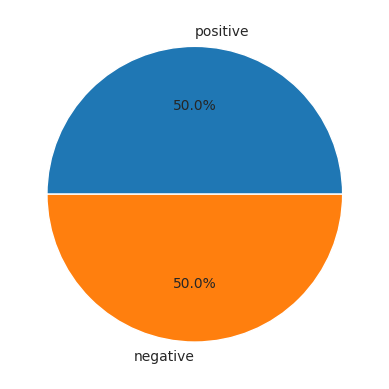

In [9]:
plt.pie(df["sentiment"].value_counts(), labels=df["sentiment"].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [10]:
df["char_count"] = df["review"].str.len()

df["word_count"] = df["review"].apply(lambda rev: len(rev.split()))

df["mean_word_length"] = df["review"].apply(lambda rev: np.mean([len(word) for word in rev.split()]))

df.head(10)

,review,sentiment,char_count,word_count,mean_word_length
15812,This was a great movie! It was a completely en...,positive,1107,195,4.682051
8801,"Hilarious, clean, light-hearted, and quote-wor...",positive,1014,171,4.935673
29826,WOW! What - a - movie !!!!!!!!!!! I'm not at a...,positive,981,187,4.251337
23395,I watched the movie about 13 yrs ago while liv...,positive,953,179,4.329609
31103,I suppose this movie is not your typical Spani...,positive,795,156,4.102564
44408,"i just wanted to say i liked this movie a lot,...",positive,973,173,4.630058
24440,"I thought this movie was great, not only becau...",positive,708,127,4.582677
22827,"Simple, meaningful and delivers an emotional p...",positive,678,115,4.904348
15503,"Old horror movies are interesting, plenty of s...",positive,1127,216,4.222222
45395,"Functioning as a sort of midpoint between ""Wai...",positive,663,114,4.824561


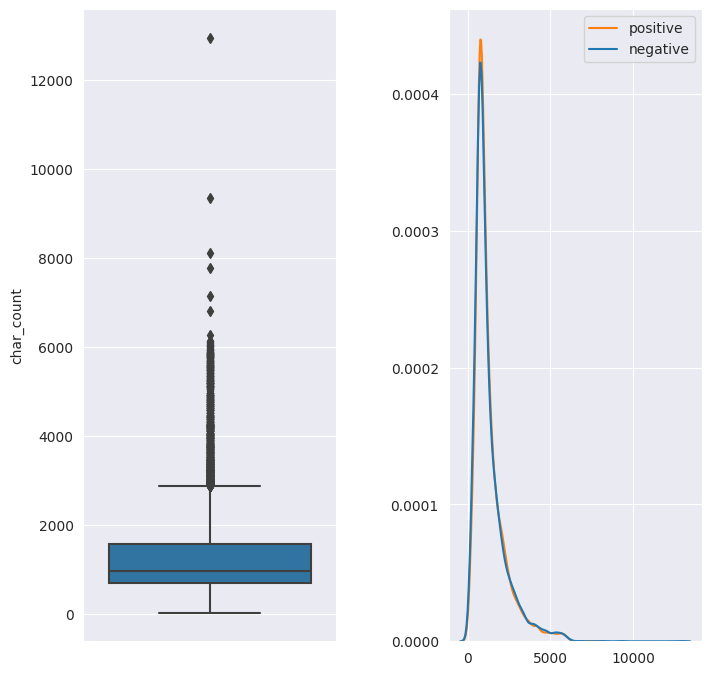

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
fig.tight_layout(pad=5.0)

seaborn.boxplot(y=df["char_count"], hue=df["sentiment"], ax=axes[0])
plt.ylabel("char_count", labelpad=12.5)

seaborn.kdeplot(x=df["char_count"], hue=df["sentiment"], ax=axes[1])
plt.legend(df["sentiment"].unique())
plt.xlabel('')
plt.ylabel('')

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/char_count-before-nlp.png")
plt.show()

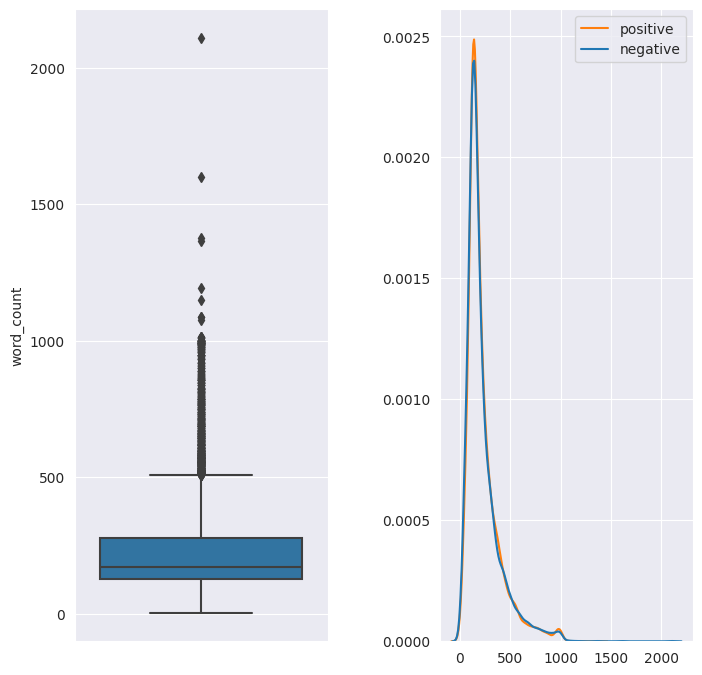

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
fig.tight_layout(pad=5.0)

seaborn.boxplot(y=df["word_count"], hue=df["sentiment"], ax=axes[0])
plt.ylabel("word_count", labelpad=12.5)

seaborn.kdeplot(x=df["word_count"], hue=df["sentiment"], ax=axes[1])
plt.legend(df["sentiment"].unique())
plt.xlabel('')
plt.ylabel('')

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/word_count-before-nlp.png")
plt.show()

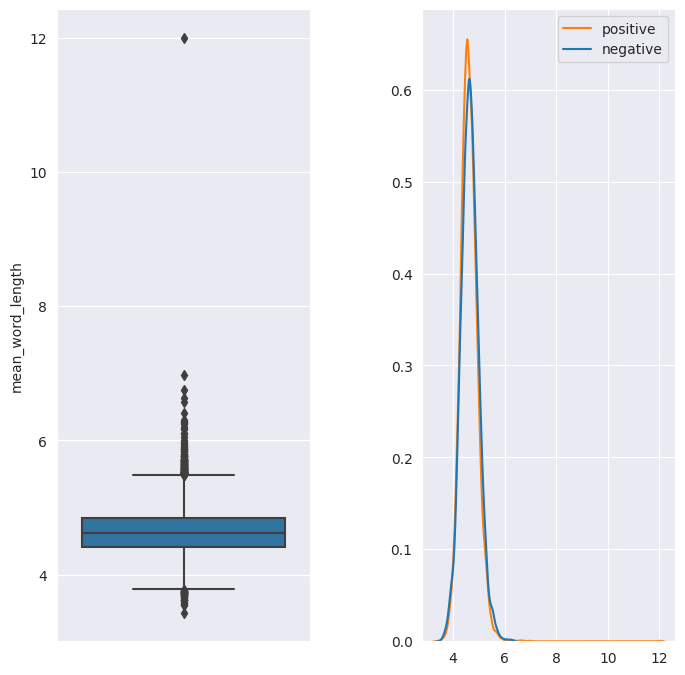

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
fig.tight_layout(pad=5.0)

seaborn.boxplot(y=df["mean_word_length"], hue=df["sentiment"], ax=axes[0])
plt.ylabel("mean_word_length", labelpad=12.5)

seaborn.kdeplot(x=df["mean_word_length"], hue=df["sentiment"], ax=axes[1])
plt.legend(df["sentiment"].unique())
plt.xlabel('')
plt.ylabel('')

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/mean_word_length-before-nlp.png")
plt.show()

# NLP

In [14]:
def process_text(doc):
  doc = doc.lower()

  # Utilizando BeautifulSoup para remover tags html to texto.
  doc = BeautifulSoup(doc, "html.parser").text

  res = []
  for token in nlp(doc):
    if token.is_stop or token.is_punct:
      continue
    elif token.like_num or token.is_currency:
      continue
    elif token.like_url or token.like_email:
      continue
    elif len(token.text) < 4:
      continue

    res.append(token.lemma_)

  return ' '.join(res)

In [15]:
#df["review nlp"] = df["review"].progress_apply(process_text)
#df.to_csv('data.csv')
#!cp data.csv "/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/"

# EDA

In [16]:
df = pd.read_csv("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/data.csv")

In [17]:
df["char_count"] = df["review nlp"].str.len()

df["word_count"] = df["review nlp"].apply(lambda rev: len(rev.split()))

df["mean_word_length"] = df["review nlp"].apply(lambda rev: np.mean([len(word) for word in rev.split()]))

df.head(10)

,Unnamed: 0,review,sentiment,review nlp,char_count,word_count,mean_word_length
0,15812,This was a great movie! It was a completely en...,positive,great movie completely enjoyable adolescent fa...,610,85,6.188235
1,8801,"Hilarious, clean, light-hearted, and quote-wor...",positive,hilarious clean light hearted quote worthy fil...,511,73,6.013699
2,29826,WOW! What - a - movie !!!!!!!!!!! I'm not at a...,positive,movie contemporary italian director usually li...,436,65,5.723077
3,23395,I watched the movie about 13 yrs ago while liv...,positive,watch movie live airlie beach australia find s...,421,62,5.806452
4,31103,I suppose this movie is not your typical Spani...,positive,suppose movie typical spanish thriller base re...,391,65,5.030769
5,44408,"i just wanted to say i liked this movie a lot,...",positive,want like movie want know artist song song you...,393,57,5.912281
6,24440,"I thought this movie was great, not only becau...",positive,think movie great storyline portray greatly ex...,356,50,6.140000
7,22827,"Simple, meaningful and delivers an emotional p...",positive,simple meaningful deliver emotional punch regu...,352,49,6.204082
8,15503,"Old horror movies are interesting, plenty of s...",positive,horror movie interesting plenty scream plenty ...,521,85,5.141176
9,45395,"Functioning as a sort of midpoint between ""Wai...",positive,function sort midpoint wait guffman mighty win...,353,51,5.941176


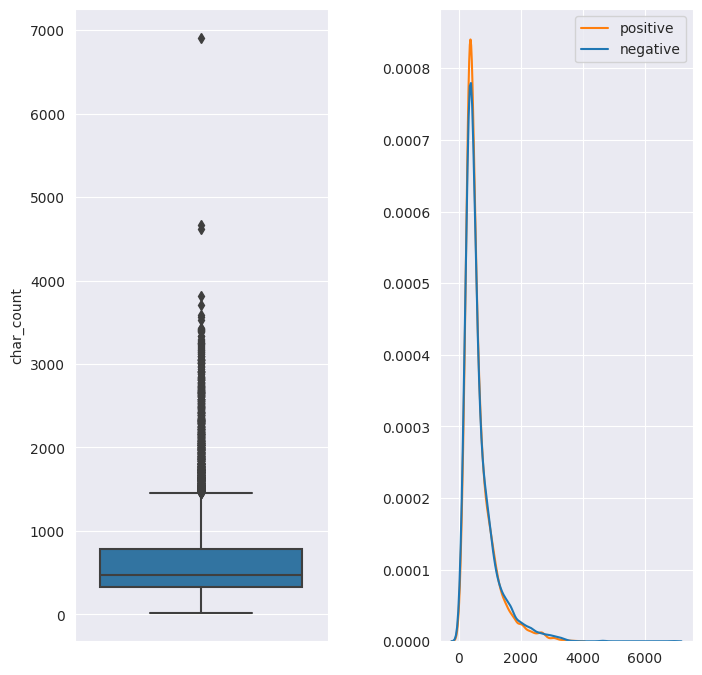

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
fig.tight_layout(pad=5.0)

seaborn.boxplot(y=df["char_count"], hue=df["sentiment"], ax=axes[0])
plt.ylabel("char_count", labelpad=12.5)

seaborn.kdeplot(x=df["char_count"], hue=df["sentiment"], ax=axes[1])
plt.legend(df["sentiment"].unique())
plt.xlabel('')
plt.ylabel('')

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/char_count-after-nlp.png")
plt.show()

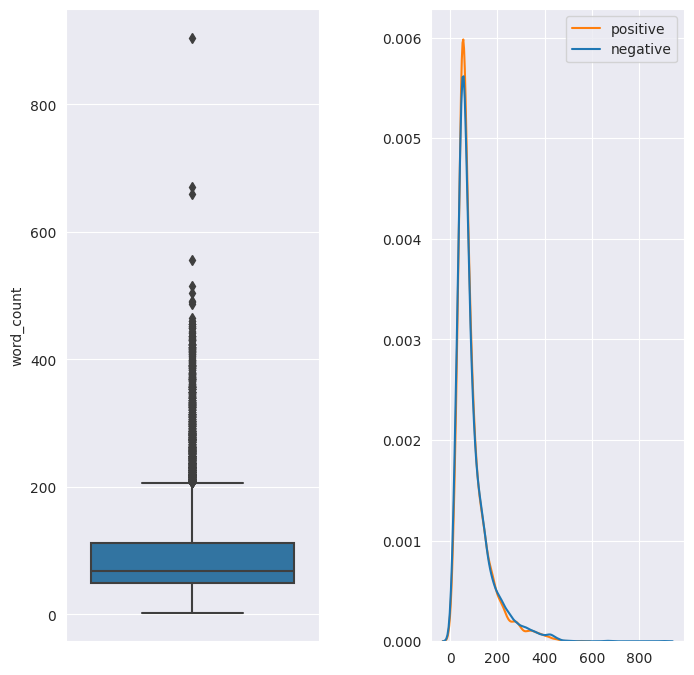

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
fig.tight_layout(pad=5.0)

seaborn.boxplot(y=df["word_count"], hue=df["sentiment"], ax=axes[0])
plt.ylabel("word_count", labelpad=12.5)

seaborn.kdeplot(x=df["word_count"], hue=df["sentiment"], ax=axes[1])
plt.legend(df["sentiment"].unique())
plt.xlabel('')
plt.ylabel('')

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/word_count-after-nlp.png")
plt.show()

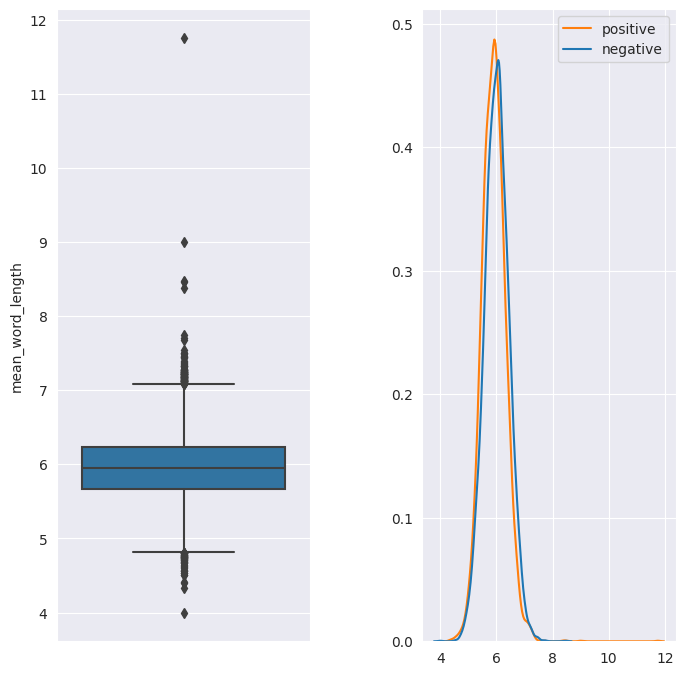

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
fig.tight_layout(pad=5.0)

seaborn.boxplot(y=df["mean_word_length"], hue=df["sentiment"], ax=axes[0])
plt.ylabel("mean_word_length", labelpad=12.5)

seaborn.kdeplot(x=df["mean_word_length"], hue=df["sentiment"], ax=axes[1])
plt.legend(df["sentiment"].unique())
plt.xlabel('')
plt.ylabel('')

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/mean_word_length-after-nlp.png")
plt.show()

In [21]:
df["sentiment binary"] = df["sentiment"].map({"negative": -1, "positive": 1})

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df["sentiment"].unique())
print(f"Column 'sentiment' classes: {list(label_encoder.classes_)}")

df["sentiment binary"] = df["sentiment"].apply(lambda x: label_encoder.transform([x])[0])
df[["sentiment", "sentiment binary"]]


Column 'sentiment' classes: ['negative', 'positive']


,sentiment,sentiment binary
0,positive,1
1,positive,1
2,positive,1
3,positive,1
4,positive,1
...,...,...
12495,negative,0
12496,negative,0
12497,negative,0
12498,negative,0


<ipython-input-22-3c875bdee974>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<Axes: >

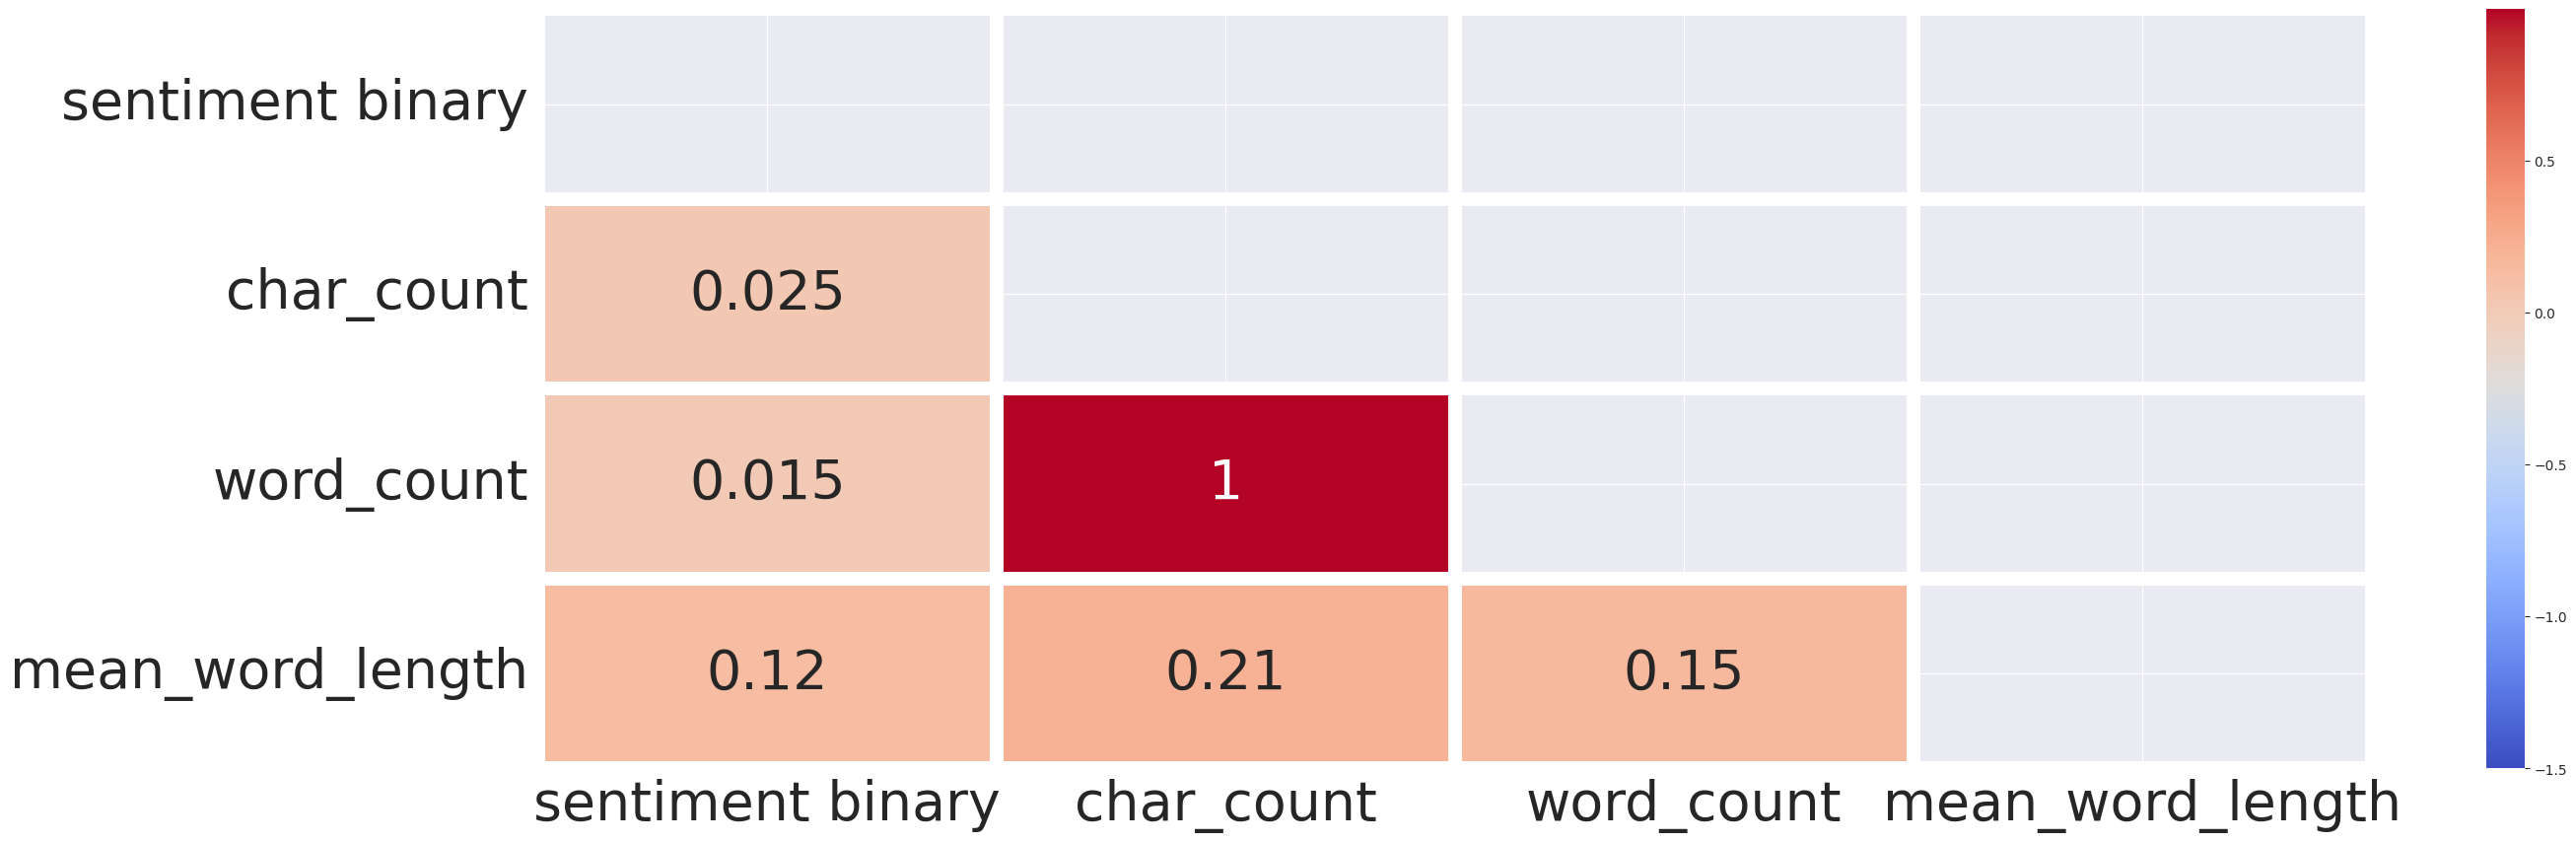

In [22]:
correlation = df[["sentiment binary", "char_count", "word_count", "mean_word_length"]].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30,10))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
seaborn.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [23]:
def count_tokens(doc):
  tokens = doc.split(" ")
  count = Counter(tokens)

  return count

In [24]:
positive_token_counters = df[df["sentiment"] == "positive"]["review nlp"].progress_apply(count_tokens).tolist()
positive_token_counters = sum(positive_token_counters, Counter())

positive_word, positive_frequency = zip(*positive_token_counters.most_common(10))
positive_word, positive_frequency = list(positive_word), list(positive_frequency)


negative_token_counters = df[df["sentiment"] == "negative"]["review nlp"].progress_apply(count_tokens).tolist()
negative_token_counters = sum(negative_token_counters, Counter())

negative_word, negative_frequency = zip(*negative_token_counters.most_common(10))
negative_word, negative_frequency = list(negative_word), list(negative_frequency)

  0%|          | 0/6250 [00:00<?, ?it/s]

  0%|          | 0/6250 [00:00<?, ?it/s]

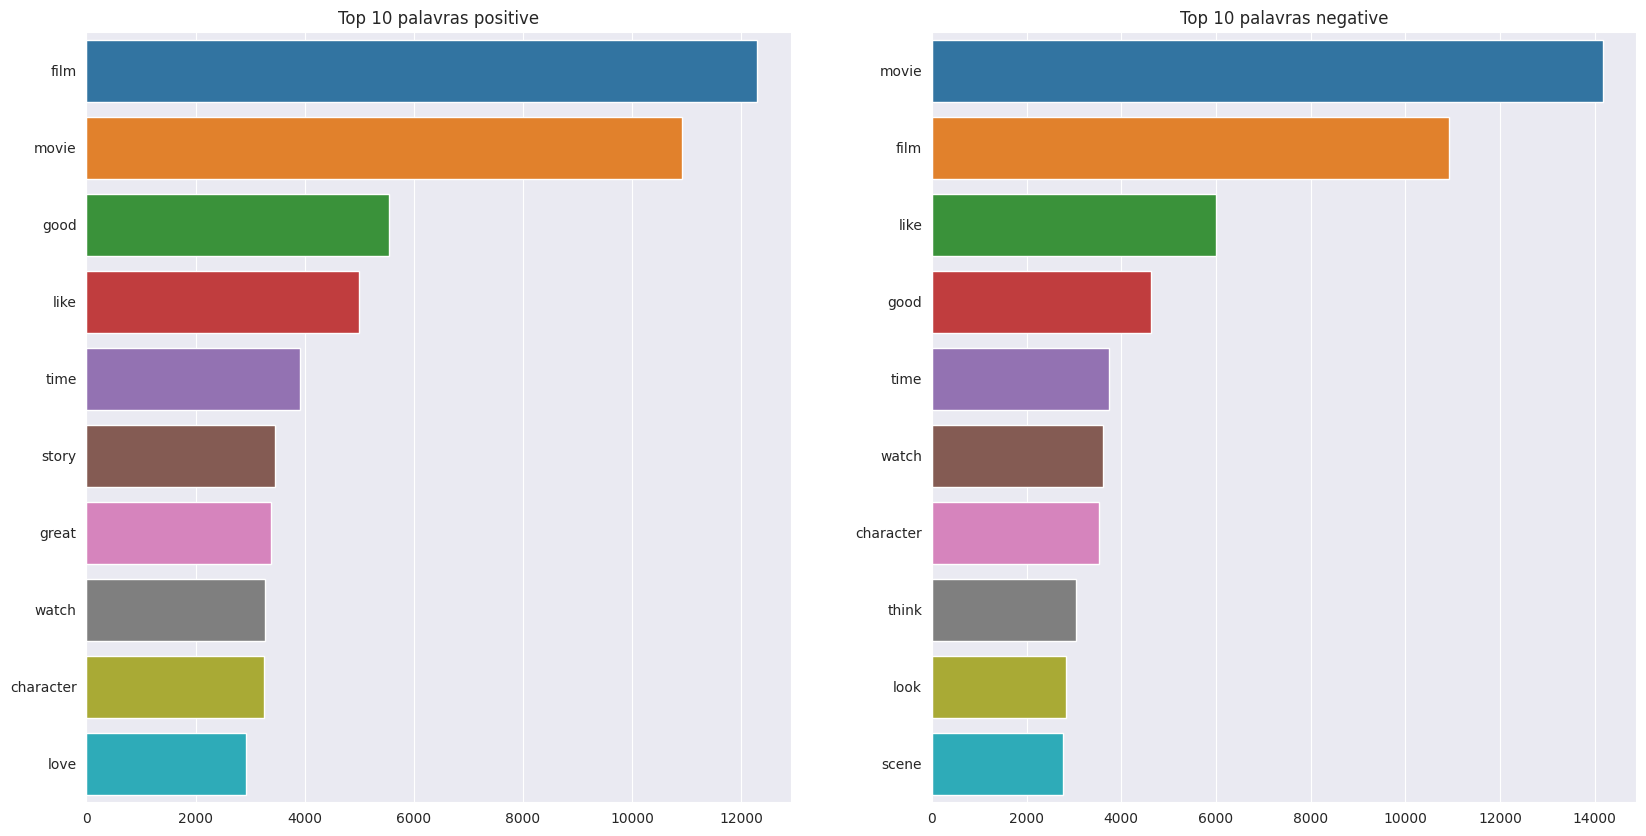

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].set_title("Top 10 palavras positive")
seaborn.barplot(x=positive_frequency, y=positive_word, ax=axes[0])

axes[1].set_title("Top 10 palavras negative")
seaborn.barplot(x=negative_frequency, y=negative_word, ax=axes[1])

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/top10palavras.png")
plt.show()

In [26]:
cv = CountVectorizer(ngram_range=(2,2))
positive_bigrams = cv.fit_transform(df[df["sentiment"] == "positive"]["review nlp"])

positive_count_values = positive_bigrams.toarray().sum(axis=0)
positive_ngram_freq = pd.DataFrame(sorted([(positive_count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
positive_ngram_freq.columns = ["frequency", "ngram"]

cv = CountVectorizer(ngram_range=(2,2))
negative_bigrams = cv.fit_transform(df[df["sentiment"] == "negative"]["review nlp"])

negative_count_values = negative_bigrams.toarray().sum(axis=0)
negative_ngram_freq = pd.DataFrame(sorted([(negative_count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
negative_ngram_freq.columns = ["frequency", "ngram"]

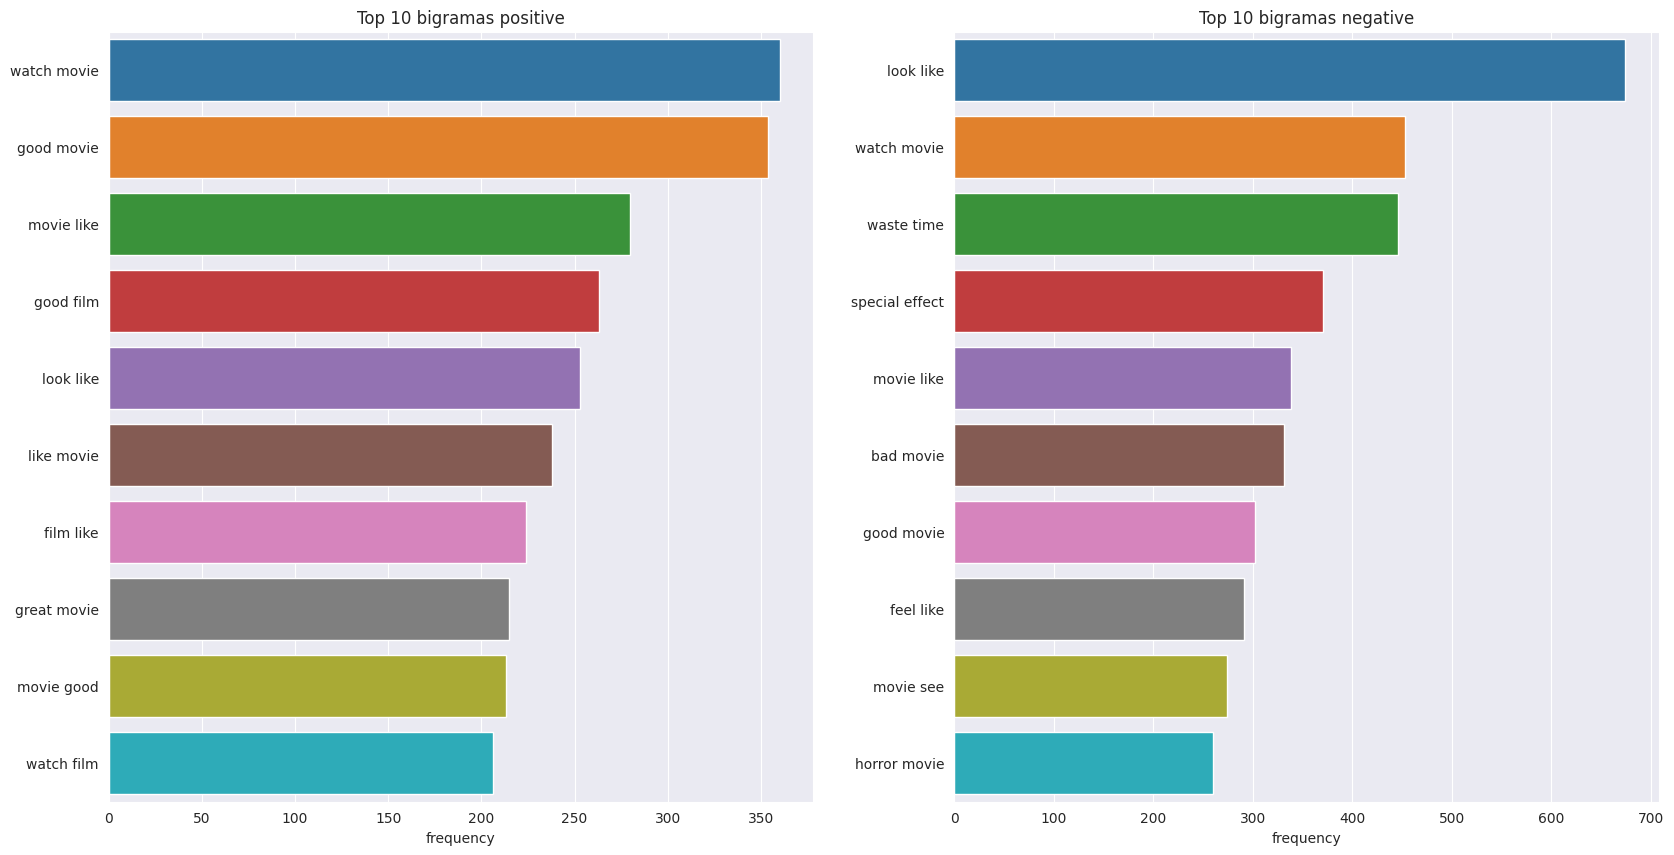

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

seaborn.barplot(x=positive_ngram_freq["frequency"][:10], y=positive_ngram_freq["ngram"][:10], ax=axes[0])
axes[0].set_title("Top 10 bigramas positive")
axes[0].set_ylabel("")

seaborn.barplot(x=negative_ngram_freq["frequency"][:10], y=negative_ngram_freq["ngram"][:10], ax=axes[1])
axes[1].set_title("Top 10 bigramas negative")
axes[1].set_ylabel("")

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/top10bigramas.png")
plt.show()

In [28]:
cv = CountVectorizer(ngram_range=(3,3))
positive_trigrams = cv.fit_transform(df[df["sentiment"] == "positive"]["review nlp"])

positive_count_values = positive_trigrams.toarray().sum(axis=0)
positive_ngram_freq = pd.DataFrame(sorted([(positive_count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
positive_ngram_freq.columns = ["frequency", "ngram"]

cv = CountVectorizer(ngram_range=(3,3))
negative_trigrams = cv.fit_transform(df[df["sentiment"] == "negative"]["review nlp"])

negative_count_values = negative_trigrams.toarray().sum(axis=0)
negative_ngram_freq = pd.DataFrame(sorted([(negative_count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
negative_ngram_freq.columns = ["frequency", "ngram"]

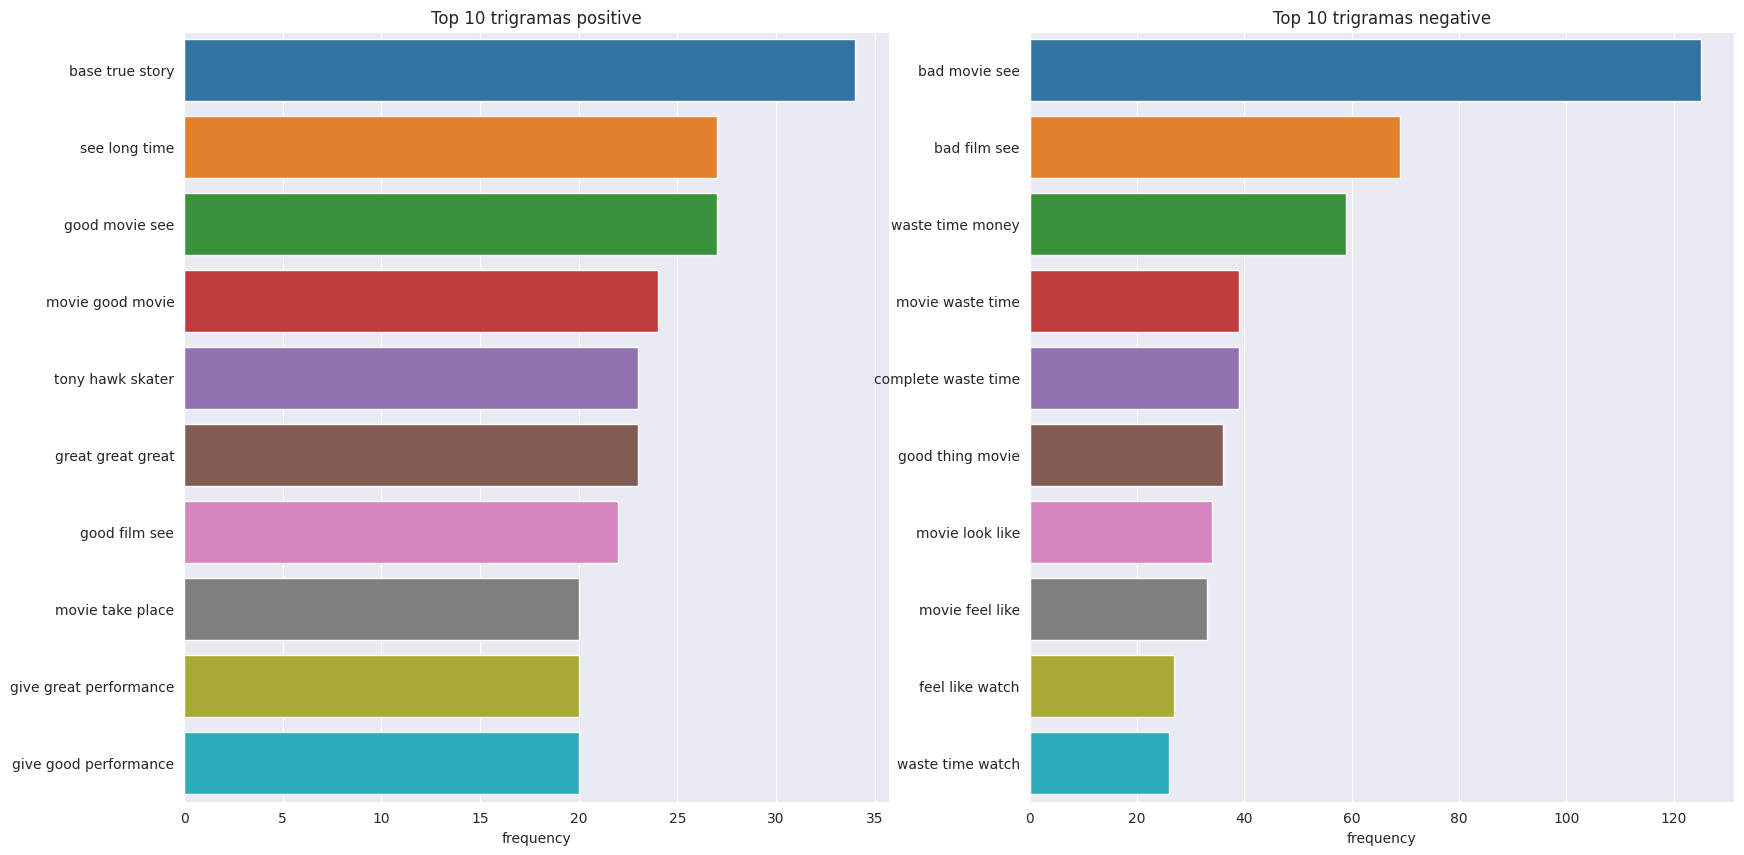

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

seaborn.barplot(x=positive_ngram_freq["frequency"][:10], y=positive_ngram_freq["ngram"][:10], ax=axes[0])
axes[0].set_title("Top 10 trigramas positive")
axes[0].set_ylabel("")

seaborn.barplot(x=negative_ngram_freq["frequency"][:10], y=negative_ngram_freq["ngram"][:10], ax=axes[1])
axes[1].set_title("Top 10 trigramas negative")
axes[1].set_ylabel("")

plt.savefig("/content/drive/MyDrive/BCC/2023.1/ML/IMDb Classification/top10trigramas.png")
plt.show()

# TF-IDF

In [30]:
vectorizers = {
    'unigram': TfidfVectorizer(use_idf=True, ngram_range=(1, 1)),
    'bigram': TfidfVectorizer(use_idf=True, ngram_range=(2, 2)),
    'trigram': TfidfVectorizer(use_idf=True, ngram_range=(3, 3))
}

X = df["review nlp"].values
X_tfidf = {}
tfidf_models = {}
Y = df["sentiment binary"].values
print('----------------------------------------------')
for key, vectorizer in vectorizers.items():
  tfidf_model = vectorizer.fit(X)

  tfidf_models[key] = tfidf_model

  print(f"ngram {vectorizer.ngram_range}")
  print(f"some features: {vectorizer.get_feature_names_out()[100:111]}")

  X_tfidf[key] = tfidf_model.transform(X)

  print("first text tf-idf values")
  print(X_tfidf[key][0,:])
  print('----------------------------------------------')

----------------------------------------------
ngram (1, 1)
some features: ['1900s' '1910' '1915' '1920' '1920s' '1922' '1930' '1930s' '1932' '1933'
 '1936']
first text tf-idf values
  (0, 45359)	0.06399946845346902
  (0, 45235)	0.06316636859318125
  (0, 44528)	0.12239911183209311
  (0, 44505)	0.11920010978541556
  (0, 43979)	0.09979979969079486
  (0, 43845)	0.15638190172914057
  (0, 42455)	0.11528778914501013
  (0, 42229)	0.0799030026094984
  (0, 40830)	0.0432217404453455
  (0, 40361)	0.11185845005359181
  (0, 38979)	0.09317730228501524
  (0, 38973)	0.0436813475779085
  (0, 37816)	0.12588839162626575
  (0, 36034)	0.09108255889108514
  (0, 35852)	0.06872639859228599
  (0, 34540)	0.09262730069410685
  (0, 33806)	0.08146235991590081
  (0, 33578)	0.11624551672609786
  (0, 33260)	0.12972864633654127
  (0, 32211)	0.10277008282317909
  (0, 31817)	0.09040454969305235
  (0, 31498)	0.07445935837548245
  (0, 31327)	0.06139394274089866
  (0, 31263)	0.14605398594320704
  (0, 31228)	0.1922159420585

# Multinomial Naive Bayes

In [42]:
df_metrics = pd.DataFrame(columns=[("accuracy", "mean"), ("accuracy", "std"), "ngram", "test size"])
df_metrics

,"(accuracy, mean)","(accuracy, std)",ngram,test size


In [46]:
models = {
    'unigram': MultinomialNB(),
    'bigram': MultinomialNB(),
    'trigram': MultinomialNB()
}

preds = {
    'unigram': [],
    'bigram': [],
    'trigram': []
}

accuracy = {
    'unigram': [],
    'bigram': [],
    'trigram': []
}

for _ in range(30):
  tfidf_sets = {}

  for key, value in X_tfidf.items():
    tfidf_train, tfidf_test, class_train, class_test = train_test_split(value, Y, test_size=0.20)

    tfidf_sets[key] = {'tfidf_train': tfidf_train,
                      'tfidf_test': tfidf_test,
                      'class_train': class_train,
                      'class_test': class_test}
  classifiers = {}

  for key, model in models.items():
    clf = model.fit(tfidf_sets[key]['tfidf_train'], tfidf_sets[key]['class_train'])
    classifiers[key] = clf
    preds[key] = clf.predict(tfidf_sets[key]['tfidf_test'])
    accuracy[key].append(metrics.accuracy_score(tfidf_sets[key]['class_test'], preds[key]))

df_metrics = pd.DataFrame({"accuracy - mean": [np.mean(accuracy["unigram"]), np.mean(accuracy["bigram"]), np.mean(accuracy["trigram"])],
                                "accuracy - std": [np.std(accuracy["unigram"]), np.std(accuracy["bigram"]), np.std(accuracy["trigram"])],
                                "ngram": ["unigram", "bigram", "trigram"],
                                "test size": ["20%", "20%", "20%"]})

In [48]:
df_metrics

,accuracy - mean,accuracy - std,ngram,test size
0,0.846973,0.006065,unigram,20%
1,0.828347,0.009598,bigram,20%
2,0.659973,0.010769,trigram,20%
